### Se estiver rodando no Google Colab, executar essa linha:

In [9]:
!git clone https://github.com/FernandaSzAdr/violencia_contra_mulher_RECIFE.git

Cloning into 'violencia_contra_mulher_RECIFE'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (76/76), done.
^Cceiving objects:  41% (49/119), 556.00 KiB | 319.00 KiB/s   


# Imports

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pickle
import re
import six
%matplotlib inline

# Helpers

##  Para salvar graficos

In [2]:
def autolabel(rects, xpos='center', ax=None):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

## Extrair informações do NPU

In [3]:
def parse_npu(numero):
    numero = u''.join(re.findall(r'\d+', numero))
    numero = numero.zfill(20)
    return {
        'sequencial': numero[0:7],
        'digito': numero[7:9],
        'ano': numero[9:13],
        'justica': numero[13:14],
        'tribunal': numero[14:16],
        'origem': numero[16:20]
    }

In [4]:
def get_ano(numero):
    if type(numero) != str:
        numero = str(numero)
    campos = parse_npu(numero)
    return int(campos['ano'])

# Análises

## Path do json

In [5]:
processos_ouvidoria_path = 'database/processos_ouvidoria.json'
processos_sequencial_path = 'database/processos_sequencial.json'

## Criação do DataFrame

In [6]:
df_proc_ouv = pd.read_json(processos_ouvidoria_path)
df_proc_seq = pd.read_json(processos_sequencial_path)

### Informações sobre os dataframes

In [7]:
df_proc_ouv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 999
Data columns (total 10 columns):
numero            9759 non-null int64
juizo             9759 non-null object
classe_CNJ        9759 non-null object
eletronico        9759 non-null bool
comarca           9759 non-null object
instancia         9759 non-null object
estado            9759 non-null object
andamentos_qtd    9759 non-null int64
assuntos          9759 non-null object
andamentos        9759 non-null object
dtypes: bool(1), int64(2), object(7)
memory usage: 772.0+ KB


In [8]:
df_proc_seq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9460 entries, 0 to 999
Data columns (total 10 columns):
numero            9460 non-null int64
juizo             9460 non-null object
classe_CNJ        9460 non-null object
eletronico        9460 non-null bool
comarca           9460 non-null object
instancia         9460 non-null object
estado            9460 non-null object
andamentos_qtd    9460 non-null int64
assuntos          9460 non-null object
andamentos        9460 non-null object
dtypes: bool(1), int64(2), object(7)
memory usage: 748.3+ KB


### Amostras dos dataframes

In [9]:
df_proc_seq.head()

,numero,juizo,classe_CNJ,eletronico,comarca,instancia,estado,andamentos_qtd,assuntos,andamentos
0,132120188170001,Primeira Vara de Violência Doméstica e Familia...,Ação Penal - Procedimento Sumário,False,Recife,1GRAU,PE,14,[Ameaça],"[{'complemento': 'Mandados', 'data': '19/03/20..."
1,262020188170001,Terceira Vara de Violência Doméstica e Familia...,Medidas Protetivas de urgência (Lei Maria da P...,False,Recife,1GRAU,PE,11,[Decorrente de Violência Doméstica],"[{'complemento': '', 'data': '11/02/2019 11:09..."
10,617720188170001,Primeira Vara de Violência Doméstica e Familia...,Medidas Protetivas de urgência (Lei Maria da P...,False,Recife,1GRAU,PE,14,[Ameaça],"[{'complemento': 'Ministério Público', 'data':..."
100,5606120188170001,Segunda Vara de Violência Doméstica e Familiar...,Medidas Protetivas de urgência (Lei Maria da P...,False,Recife,1GRAU,PE,11,[Injúria],"[{'complemento': 'Ofício Entregue', 'data': '1..."
1000,166911420188170016,Primeira Vara de Violência Doméstica e Familia...,Medidas Protetivas de urgência (Lei Maria da P...,False,Recife,1GRAU,PE,7,"[Violência Doméstica Contra a Mulher, Injúria,...","[{'complemento': 'Ciente nos autos', 'data': '..."


In [10]:
df_proc_ouv.head()

,numero,juizo,classe_CNJ,eletronico,comarca,instancia,estado,andamentos_qtd,assuntos,andamentos
0,1774826420128169984,Segunda Vara de Violência Doméstica e Familiar...,Inquérito Policial,False,Recife,1GRAU,PE,4,[Crimes Previstos no Estatuto do Idoso],"[{'complemento': 'Central de Inquéritos', 'dat..."
1,1736234020128169984,Segunda Vara de Violência Doméstica e Familiar...,Inquérito Policial,False,Recife,1GRAU,PE,22,[Crimes Previstos no Estatuto do Idoso],"[{'complemento': 'Central de Inquéritos', 'dat..."
10,1544027620098170112,Terceira Vara de Violência Doméstica e Familia...,Ação Penal - Procedimento Sumário,False,Recife,1GRAU,PE,26,"[Decorrente de Violência Doméstica, Violência ...","[{'complemento': '', 'data': '12/09/2018 10:23..."
100,856377720148169984,Terceira Vara de Violência Doméstica e Familia...,Inquérito Policial,False,Recife,1GRAU,PE,14,[Ameaça],"[{'complemento': 'Ministério Público', 'data':..."
1000,208506820168170016,Terceira Vara de Violência Doméstica e Familia...,Inquérito Policial,False,Recife,1GRAU,PE,9,"[Violência Doméstica Contra a Mulher, Ameaça]","[{'complemento': '', 'data': '20/06/2019 13:21..."


## Agrupando os dois DataFrames
O DataFrame obtido gerando os npus sequencialmente e o DataFrame fornecido pelo TJPE

In [11]:
df_total = pd.concat([df_proc_ouv, df_proc_seq],
                     ignore_index=True)

In [12]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 10 columns):
numero            19219 non-null int64
juizo             19219 non-null object
classe_CNJ        19219 non-null object
eletronico        19219 non-null bool
comarca           19219 non-null object
instancia         19219 non-null object
estado            19219 non-null object
andamentos_qtd    19219 non-null int64
assuntos          19219 non-null object
andamentos        19219 non-null object
dtypes: bool(1), int64(2), object(7)
memory usage: 1.3+ MB


### Removendo NPUs duplicados

In [13]:
df_total = df_total.drop_duplicates(subset='numero')

In [14]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13300 entries, 0 to 19216
Data columns (total 10 columns):
numero            13300 non-null int64
juizo             13300 non-null object
classe_CNJ        13300 non-null object
eletronico        13300 non-null bool
comarca           13300 non-null object
instancia         13300 non-null object
estado            13300 non-null object
andamentos_qtd    13300 non-null int64
assuntos          13300 non-null object
andamentos        13300 non-null object
dtypes: bool(1), int64(2), object(7)
memory usage: 1.0+ MB


## NPUs Ouvidoria

In [70]:
dict_qtd_esperado_recife = pickle.load(
    open('database/dict_anos_recife_ouvidoria.pickle', 'rb'))

### Qtd de processos esperados

In [71]:
dict_qtd_esperado_recife

{2015: 3590,
 2013: 3416,
 2014: 3244,
 2018: 2887,
 2012: 2616,
 2010: 2477,
 2016: 2460,
 2011: 2315,
 2017: 2314,
 2009: 1716,
 2008: 490,
 2007: 221,
 2006: 26,
 2005: 1,
 2004: 1}

In [72]:
anos_esperados = sorted(dict_qtd_esperado_recife.keys())
qtd_anos_esperados = [dict_qtd_esperado_recife[i] for i in anos_esperados]

### Qtd de processos obtidos

In [73]:
anos = np.array(df_proc_ouv['numero'].apply(get_ano))
npus = np.array(df_proc_ouv['numero'])

In [74]:
df_npu_recife = pd.DataFrame({'npu': npus, 'ano': anos})

In [75]:
dict_qtd_obtida_recife = dict(df_npu_recife['ano'].value_counts())

In [76]:
dict_qtd_obtida_recife

{2018: 2183,
 2015: 1464,
 2017: 1303,
 2016: 1065,
 2014: 1027,
 2013: 774,
 2012: 728,
 2011: 487,
 2010: 385,
 2009: 163,
 2008: 113,
 2007: 62,
 2006: 4,
 2005: 1}

In [77]:
dict_qtd_obtida_recife[2004] = 0

In [78]:
anos_obtidos = sorted(dict_qtd_obtida_recife.keys())
qtd_anos_obtidos = [dict_qtd_obtida_recife[i] for i in anos_obtidos]

### Grafico da distribuição de obtidos e de esperados

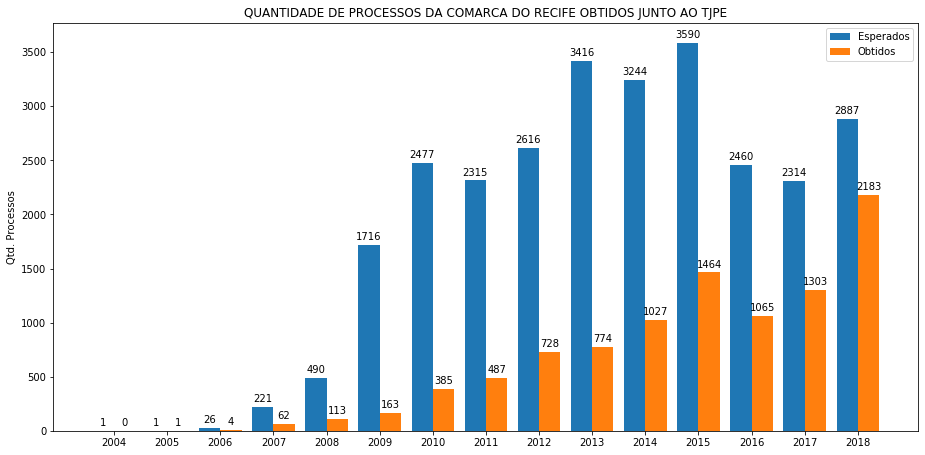

In [79]:
title = 'Processos_na_comarca_0001_(Recife)'

ind = np.arange(len(anos_esperados))
width = 0.40

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, qtd_anos_esperados, width, label='Esperados')
rects2 = ax.bar(ind + width/2, qtd_anos_obtidos, width, label='Obtidos')

ax.set_ylabel('Qtd. Processos'); ax.set_xticks(ind)
ax.set_xticklabels(anos_esperados); ax.legend()
autolabel(rects1, "center", ax); autolabel(rects2, "center", ax)

fig.set_size_inches(15.5, 7.5, forward=True)
fig.savefig('figures/{}'.format(title), dpi=100, bbox_inches='tight')
plt.title('QUANTIDADE DE PROCESSOS DA COMARCA DO RECIFE OBTIDOS JUNTO AO TJPE')
plt.show()

## NPUs Sequencial

In [61]:
dict_qtd_esperado_recife = pickle.load(
    open('database/dict_anos_esperados_recife_sequencial.pickle', 'rb'))
dict_qtd_obtido_recife = pickle.load(
    open('database/dict_anos_pegos_recife_sequencial.pickle', 'rb'))

### Qtd de processos esperados

In [62]:
dict_qtd_esperado_recife

{2004: 11323,
 2005: 5373,
 2006: 5333,
 2007: 4809,
 2008: 5069,
 2009: 8748,
 2010: 16831,
 2011: 16558,
 2012: 17460,
 2013: 17302,
 2014: 18466,
 2015: 17366,
 2016: 11605,
 2017: 12519,
 2018: 15075}

In [63]:
sum(dict_qtd_esperado_recife.values())

183837

In [64]:
anos_esperados = sorted(dict_qtd_esperado_recife.keys())
qtd_anos_esperados = [dict_qtd_esperado_recife[i] for i in anos_esperados]

### Qtd de processos obtidos

In [65]:
dict_qtd_obtido_recife

{2004: 0,
 2005: 0,
 2006: 0,
 2007: 8,
 2008: 18,
 2009: 2,
 2010: 132,
 2011: 235,
 2012: 334,
 2013: 286,
 2014: 407,
 2015: 972,
 2016: 1111,
 2017: 2169,
 2018: 3786}

In [66]:
sum(dict_qtd_obtido_recife.values())

9460

In [67]:
anos_obtidos = sorted(dict_qtd_obtido_recife.keys())
qtd_anos_obtidos = [dict_qtd_obtido_recife[i] for i in anos_obtidos]

### Grafico da distribuição de obtidos e de esperados

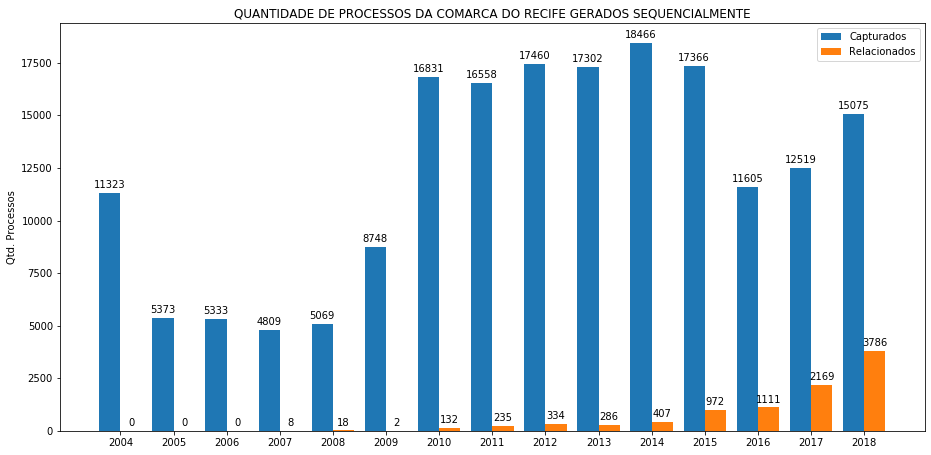

In [69]:
title = 'Processos_na_comarca_0001_(Recife)_sequencial'

ind = np.arange(len(anos_esperados))
width = 0.40

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, qtd_anos_esperados, width, label='Capturados')
rects2 = ax.bar(ind + width/2, qtd_anos_obtidos, width, label='Relacionados')

ax.set_ylabel('Qtd. Processos'); ax.set_xticks(ind)
ax.set_xticklabels(anos_esperados); ax.legend()
autolabel(rects1, "center", ax); autolabel(rects2, "center", ax)

x'
fig.savefig('figures/{}'.format(title), dpi=100, bbox_inches='tight')
plt.title('QUANTIDADE DE PROCESSOS DA COMARCA DO RECIFE GERADOS SEQUENCIALMENTE')
plt.show()

## Distribuição por ano

In [91]:
df_total['ano'] = df_total['numero'].apply(get_ano)

In [101]:
df_total.to_json('database/processos_totais.json')

In [92]:
df_total.head()

,numero,juizo,classe_CNJ,eletronico,comarca,instancia,estado,andamentos_qtd,assuntos,andamentos,ano
0,1774826420128169984,Segunda Vara de Violência Doméstica e Familiar...,Inquérito Policial,False,Recife,1GRAU,PE,4,[Crimes Previstos no Estatuto do Idoso],"[{'complemento': 'Central de Inquéritos', 'dat...",2012
1,1736234020128169984,Segunda Vara de Violência Doméstica e Familiar...,Inquérito Policial,False,Recife,1GRAU,PE,22,[Crimes Previstos no Estatuto do Idoso],"[{'complemento': 'Central de Inquéritos', 'dat...",2012
2,1544027620098170112,Terceira Vara de Violência Doméstica e Familia...,Ação Penal - Procedimento Sumário,False,Recife,1GRAU,PE,26,"[Decorrente de Violência Doméstica, Violência ...","[{'complemento': '', 'data': '12/09/2018 10:23...",2009
3,856377720148169984,Terceira Vara de Violência Doméstica e Familia...,Inquérito Policial,False,Recife,1GRAU,PE,14,[Ameaça],"[{'complemento': 'Ministério Público', 'data':...",2014
4,208506820168170016,Terceira Vara de Violência Doméstica e Familia...,Inquérito Policial,False,Recife,1GRAU,PE,9,"[Violência Doméstica Contra a Mulher, Ameaça]","[{'complemento': '', 'data': '20/06/2019 13:21...",2016


In [104]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13300 entries, 0 to 9999
Data columns (total 11 columns):
numero            13300 non-null int64
juizo             13300 non-null object
classe_CNJ        13300 non-null object
eletronico        13300 non-null bool
comarca           13300 non-null object
instancia         13300 non-null object
estado            13300 non-null object
andamentos_qtd    13300 non-null int64
assuntos          13300 non-null object
andamentos        13300 non-null object
ano               13300 non-null int64
dtypes: bool(1), int64(3), object(7)
memory usage: 1.1+ MB


In [93]:
dict_total_obtido = dict(df_total['ano'].value_counts())

In [94]:
dict_total_obtido

{2018: 3901,
 2017: 2281,
 2015: 1639,
 2016: 1384,
 2014: 1120,
 2013: 840,
 2012: 814,
 2011: 537,
 2010: 426,
 2009: 165,
 2008: 121,
 2007: 67,
 2006: 4,
 2005: 1}

In [96]:
anos_obtidos = sorted(dict_total_obtido.keys())
qtd_anos_obtidos = [dict_total_obtido[i] for i in anos_obtidos]

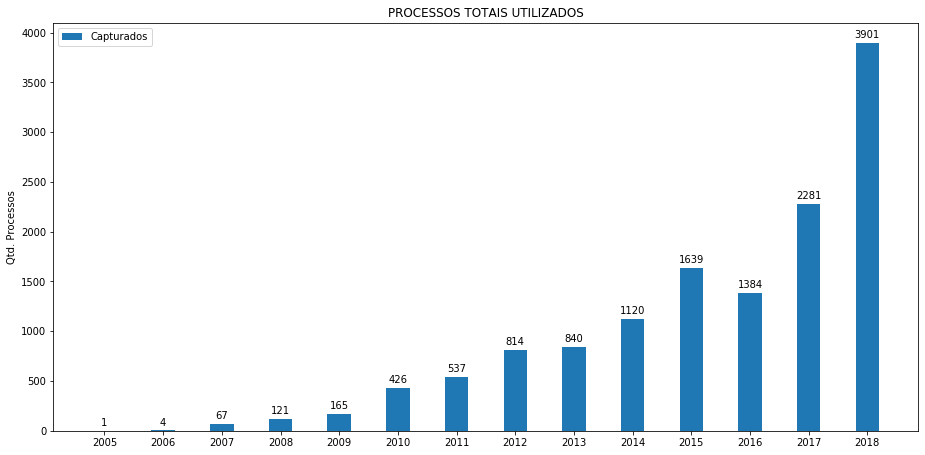

In [99]:
title = 'Processos_totais_utilizados'

ind = np.arange(len(anos_obtidos))
width = 0.40

fig, ax = plt.subplots()
rects1 = ax.bar(ind, qtd_anos_obtidos, width, label='Capturados')

ax.set_ylabel('Qtd. Processos'); ax.set_xticks(ind)
ax.set_xticklabels(anos_obtidos); ax.legend()
autolabel(rects1, "center", ax)

fig.set_size_inches(15.5, 7.5, forward=True)
fig.savefig('figures/{}'.format(title), dpi=100, bbox_inches='tight')
plt.title('PROCESSOS TOTAIS UTILIZADOS')
plt.show()